In [2]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sint

from src.utils.plotting import init_plot_style
# % pylab

# initialize our global plot style
init_plot_style()

## Task b)

In [3]:
class RickerModel:
    """
    Implementation of the logistic map.
    """

    def __init__(self, r: float):
        """
        Parameters
        ----------
        r : float
            Control parameter of the logistic map.
        """
        self.r = r

    def __call__(self, x: np.ndarray):
        """ The logistic map.

        Parameters
        ----------
        x : numpy.ndarray
            State or batch of states

        Returns
        ------
        numpy.ndarray
            The logistic map applied to the input state(s)
        """
        return x * np.exp( - self.r * (1. - x) )

    def derivative(self, x: np.ndarray):
        """ Derivative of the logistic map evaluated at the input state(s).

        Parameters
        ----------
        x : numpy.ndarray
            State or batch of states

        Returns
        ------
         numpy.ndarray
            The derivative(s) evaluated at x
        """
        return np.exp( - self.r * (1. - x) ) * (1. + self.r * x)

    def compute_trajectory(self, x0: np.ndarray, n_max: int):
        """ Computes the system trajectory for a given initial state.

        Parameters
        ----------
        x0 : numpy.ndarray
            Initial state(s)
        n_max : int
            Trajectory length

        Returns
        ------
         numpy.ndarray
            The trajectories (sequence of states for each inital state)
        """
        if np.isscalar(x0):
            x0 = np.array(x0)

        x0 = x0.reshape((-1,))

        trajectories = np.zeros((len(x0), n_max))
        trajectories[:, 0] = x0
        for n in range(1, n_max):
            trajectories[:, n] = self(trajectories[:, n - 1])

        return trajectories if len(x0) > 1 else trajectories.squeeze(0)



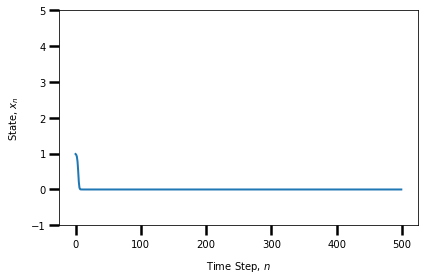

In [4]:
%matplotlib inline
# parameters
r = 1.9
x0 = 0.99

# instantiate logistic map +  compute trajectory
rickerMap = RickerModel(r=r)
trajectory = rickerMap.compute_trajectory(x0, n_max=500)

# plot trajectory as a function of time
plt.close('all')
plt.figure()
plt.plot(trajectory[:500])
plt.xlabel('Time Step, $n$')
plt.ylabel('State, $x_n$')
plt.ylim([-1,5])
plt.tight_layout()

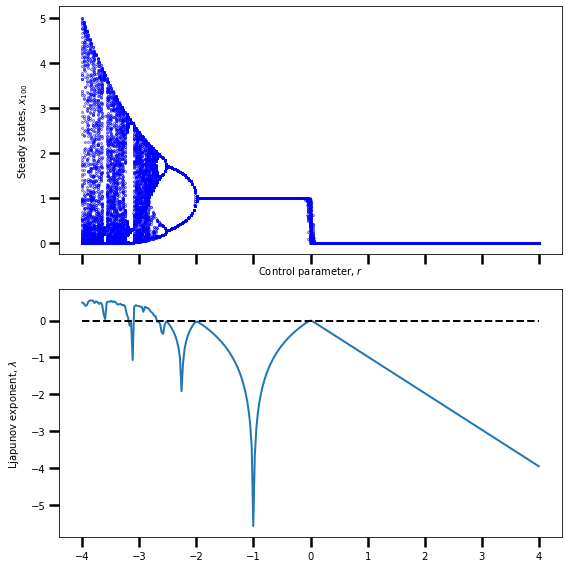

In [5]:
%matplotlib inline

# parameters
r_sweep = np.linspace(-4, 4, 300)

num_trajectories = 200
n_max = 100

# create the logistic maps + sample trajectories
rickerMaps = [RickerModel(r) for r in r_sweep]
initial_states = np.random.uniform(0, 0.99, num_trajectories)
trajectories = np.array([rm.compute_trajectory(initial_states, n_max) for rm in rickerMaps])

# extract steady states + compute Ljapunov exponents
steady_states = trajectories[:, :, -1]
derivatives = np.array([rm.derivative(traj) for rm, traj in zip(rickerMaps, trajectories)])
ljpnv_exp = np.mean(np.sum(np.log(np.abs(derivatives)), axis=2), axis=1) / n_max

plt.close('all')
fix, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
ax[0].plot(r_sweep, steady_states, 'b.', markersize=1)
ax[0].set_xlabel(r'Control parameter, $r$')
ax[0].set_ylabel(r'Steady states, $x_{%d}$' % n_max)

ax[1].plot(r_sweep, ljpnv_exp)
ax[1].plot([r_sweep[0], r_sweep[-1]], [0, 0], 'k--')
ax[1].set_ylabel(r'Ljapunov exponent, $\lambda$')
plt.tight_layout()
